In [60]:
##SVM

In [61]:
import warnings

warnings.filterwarnings('ignore')

1. Linear SVM - HARD MARGIN

The status of the problem is:  optimal
The omega valyes are:  [0.11130448 0.10212369]
The gama value is 13.296207095417646


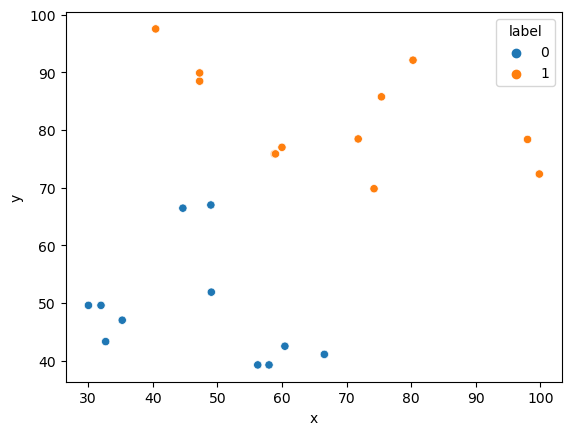

In [72]:
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
#importing the dataset
df = pd.read_csv('Linear.csv')# loading the linear dataset
df.columns
y=df['label']# giving the output as label  from te dataset to the y
x=df.drop(columns='label')# and by dropping the y column from the data giving the rest of the data to x
                           
x = np.array(x)#converting into numeric array

y=y.replace(0,-1)#we are replacing the values in y from 0 to 1
d=np.diag(y)
e=np.ones(x.shape[0])
#The variables which are to be found and unknown 
w=cp.Variable(x.shape[1]) # finding the omega values
r=cp.Variable() # finding the gama value
#Now the optimisation problem starts:
obj=(0.5*cp.norm(w)**2)
obj=cp.Minimize(obj)
const=[(cp.matmul(d,(cp.matmul(x,w) - r*e)))>=e]

prob=cp.Problem(obj,const)
prob.solve()
import seaborn as sns
sns.scatterplot(data=df,x='x',y='y',hue='label')

print("The status of the problem is: ",prob.status)
print("The omega valyes are: ",w.value)
print("The gama value is",r.value)

2.L1 Soft Margin:

In [ ]:
Seed = 200
def g_d(n):
    np.random.seed(Seed)
    x1 = np.random.normal(2,1,(2,n))
    x2 = np.random.normal(-2,1,(2,n))
    y1 = np.ones(n)
    y2 = np.ones(n)*-1
    return x1,y1,x2,y2
n = 20
x1,y1,x2,y2 = g_d(n)
x1 = np.transpose(x1)
x2 = np.transpose(x2)
x = np.vstack((x1,x2))
y = np.hstack((y1,y2))
D = np.diag(y)
L = len(x)
e = np.ones(L)

w = cp.Variable(2)
slack = cp.Variable(L)
g = cp.Variable()
c = 1.05

obj = cp.Minimize(0.5*cp.norm(w)**2+c*np.transpose(e)*slack)
cons = [np.matmul(D,x*w+e*g)+slack>=e,slack>=0]
prob = cp.Problem(obj,cons)
soln = prob.solve()
print("The status of the problem is: ",prob.status)
print("The omega valyes are: ",w.value)
print("The gama value is",g.value)

import seaborn as sns
df=pd.DataFrame({'x':x[:,0], 'y':x[:,1], 'class':y})
sns.scatterplot(data=df,x='x',y='y',hue='class')

2.1: L1 soft margin for non linear dataset

In [113]:
Seed = 200
df = pd.read_csv('heart.csv')# loading the linear dataset
df.columns
y=df['output']# giving the output as label  from te dataset to the y
x=df.drop(columns='output')# and by dropping the y column from the data giving the rest of the data to x
                           
x = np.array(x)#converting into numeric array

y=y.replace(0,-1)#we are replacing the values in y from 0 to 1
D = np.diag(y)
L = len(x)
e = np.ones(L)


w = cp.Variable(x.shape[1])
slack = cp.Variable(x.shape[0])
g = cp.Variable(1)
c = 1.05

obj = cp.Minimize(0.5*cp.norm(w)**2+c*np.transpose(e)*slack)
cons = [np.matmul(D,x*w+e*g)+slack>=e,slack>=0]
prob = cp.Problem(obj,cons)
soln = prob.solve()
print("The status of the problem is: ",prob.status)
print("The omega valyes are: ",w.value)
print("The gama value is",g.value)



The status of the problem is:  optimal
The omega valyes are:  [ 0.00403354 -1.00567162  0.67746509 -0.01469462 -0.00150656  0.18362839
  0.11866719  0.01299922 -0.60808524 -0.46294969  0.41742414 -0.51752846
 -0.84529681]
The gama value is [2.69371617]


3. L2 method:

The status of the problem is:  optimal
The omega values are:  [0.1825751  0.23312787]
The gama value is 0.07002081303425323


<AxesSubplot:xlabel='x', ylabel='y'>

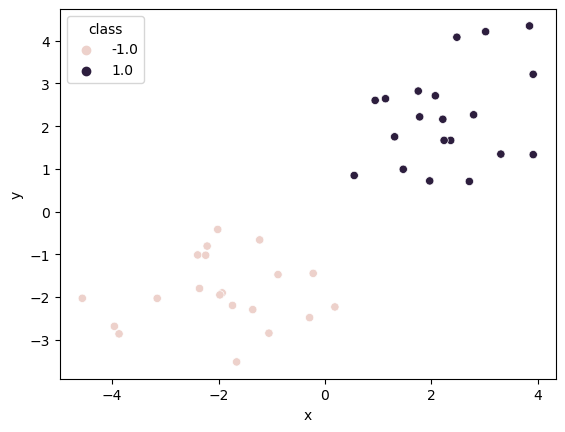

In [104]:
Seed = 200
def g_d(n):
    np.random.seed(Seed)
    x1 = np.random.normal(2,1,(2,n))
    x2 = np.random.normal(-2,1,(2,n))
    y1 = np.ones(n)
    y2 = np.ones(n)*-1
    return x1,y1,x2,y2
n = 20
x1,y1,x2,y2 = g_d(n)
x1 = np.transpose(x1)
x2 = np.transpose(x2)
x = np.vstack((x1,x2))
y = np.hstack((y1,y2))
D = np.diag(y)
L = len(x)
e = np.ones(L)

w = cp.Variable(2)
slack = cp.Variable(L)
g = cp.Variable()
c = 1.05
obj = cp.Minimize(0.5*cp.norm(w)**2+(c/2)*cp.norm(slack))
cons = [np.matmul(D,x*w - e*g)+slack==e]
prob = cp.Problem(obj,cons)
soln = prob.solve()
print("The status of the problem is: ",prob.status)
print("The omega values are: ",w.value)
print("The gama value is",g.value)

import seaborn as sns
df=pd.DataFrame({'x':x[:,0], 'y':x[:,1], 'class':y})
sns.scatterplot(data=df,x='x',y='y',hue='class')

3.1: L2 soft margin for non linear dataset

In [109]:
Seed = 200
df = pd.read_csv('new_test.csv')# loading the linear dataset
df.columns
y=df['poutcome']# giving the output as label  from te dataset to the y
x=df.drop(columns='poutcome')# and by dropping the y column from the data giving the rest of the data to x
                           
x = np.array(x)#converting into numeric array

y=y.replace(0,-1)#we are replacing the values in y from 0 to 1
D = np.diag(y)
L = len(x)
e = np.ones(L)


w = cp.Variable(x.shape[1])
slack = cp.Variable(x.shape[0])
g = cp.Variable(1)
c = 1.05

obj = cp.Minimize(0.5*cp.norm(w)**2+(c/2)*cp.norm(slack))
cons = [np.matmul(D,x*w - e*g)+slack==e]
prob = cp.Problem(obj,cons)
soln = prob.solve()
print("The status of the problem is: ",prob.status)
print("The omega valyes are: ",w.value)
print("The gama value is",g.value)




The status of the problem is:  optimal
The omega valyes are:  [-9.02661250e-12  1.44517368e-11 -7.78477281e-11  7.80347657e-11
  6.10321532e-10  1.83660723e-10  2.70487257e-11  1.82705409e-08
 -6.09899776e-10  2.82056028e-10 -8.65192031e-12  3.90320209e-10]
The gama value is [1.]


4.Proximal SVM

The status of the problem is:  optimal
The omega values are:  [0.18247564 0.23299814]
The gama value is 0.06320946552218139


<AxesSubplot:xlabel='x', ylabel='y'>

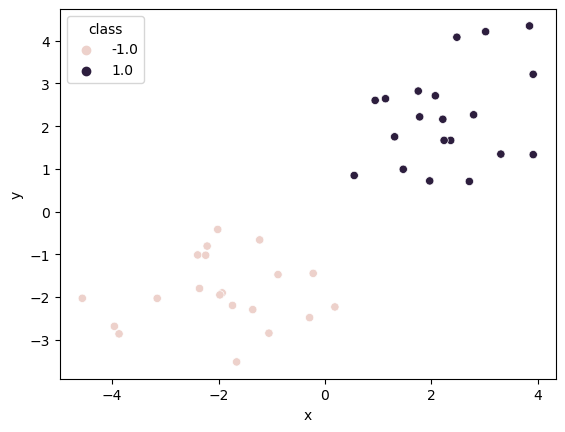

In [105]:
Seed = 200
def g_d(n):
    np.random.seed(Seed)
    x1 = np.random.normal(2,1,(2,n))
    x2 = np.random.normal(-2,1,(2,n))
    y1 = np.ones(n)
    y2 = np.ones(n)*-1
    return x1,y1,x2,y2
n = 20
x1,y1,x2,y2 = g_d(n)
x1 = np.transpose(x1)
x2 = np.transpose(x2)
x = np.vstack((x1,x2))
y = np.hstack((y1,y2))
D = np.diag(y)
L = len(x)
e = np.ones(L)

w = cp.Variable(2)
slack = cp.Variable(L)
g = cp.Variable()
c = 1.05
obj = cp.Minimize(0.5*(cp.norm(w)**2 + g**2)+(c/2)*cp.norm(slack))
cons = [np.matmul(D,x*w - e*g)+slack==e]
prob = cp.Problem(obj,cons)
soln = prob.solve()
print("The status of the problem is: ",prob.status)
print("The omega values are: ",w.value)
print("The gama value is",g.value)

import seaborn as sns
df=pd.DataFrame({'x':x[:,0], 'y':x[:,1], 'class':y})
sns.scatterplot(data=df,x='x',y='y',hue='class')

4.Proximal SVM for non linear dataset

In [114]:
Seed = 200
df = pd.read_csv('heart.csv')# loading the linear dataset
df.columns
y=df['output']# giving the output as label  from te dataset to the y
x=df.drop(columns='output')# and by dropping the y column from the data giving the rest of the data to x
                           
x = np.array(x)#converting into numeric array

y=y.replace(0,-1)#we are replacing the values in y from 0 to 1
D = np.diag(y)
L = len(x)
e = np.ones(L)

w = cp.Variable(x.shape[1])
slack = cp.Variable(x.shape[0])
g = cp.Variable(1)
c = 1.05

obj = cp.Minimize(0.5*(cp.norm(w)**2 + g**2)+(c/2)*cp.norm(slack))
cons = [np.matmul(D,x*w - e*g)+slack==e]
prob = cp.Problem(obj,cons)
soln = prob.solve()
print("The status of the problem is: ",prob.status)
print("The omega valyes are: ",w.value)
print("The gama value is",g.value)



The status of the problem is:  optimal
The omega valyes are:  [ 0.00087941 -0.28908436  0.22111891 -0.00346565 -0.00054703  0.00825903
  0.09480127  0.00797477 -0.21229524 -0.12843368  0.12862583 -0.19443423
 -0.21192147]
The gama value is [-0.02430339]


APPLICATION#1 : Heart Disease Prediction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm
from sklearn.svm import SVC
from sklearn import datasets as dm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('heart.csv')
df.columns
y=df['output']
x=df.drop(columns='output')
[X_train,X_test,Y_train,Y_test] = train_test_split(x,y,test_size=0.3,random_state=8)
svc = SVC()
#svc = SVC(kernel='rbf', C=float("inf"))
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)
print("Confusion Matrix:")
print(sm.confusion_matrix(Y_test,y_pred))
print("Accuracy Score: ")
print(sm.accuracy_score(Y_test,y_pred))
print("Complete Report")
print(sm.classification_report(Y_test,y_pred))



APPLICATION#2 :Non linear data structure using KERNELS:

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics as sm


iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Training with a linear kernel
linear_svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
linear_accuracy = linear_svc.score(X_test, y_test)
y_pred = linear_svc.predict(X_test)
accuracy_1 = sm.accuracy_score(y_test, y_pred)

# Training with a polynomial kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
poly_accuracy = poly_svc.score(X_test, y_test)
y_pred = poly_svc.predict(X_test)
accuracy_2 = sm.accuracy_score(y_test, y_pred)

# Training with a RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1).fit(X_train, y_train)
rbf_accuracy = rbf_svc.score(X_test, y_test)
y_pred = rbf_svc.predict(X_test)
accuracy_3 = sm.accuracy_score(y_test, y_pred)

# Training with a sigmoid kernel
sig_svc = svm.SVC(kernel='sigmoid', gamma='auto', C=1).fit(X_train, y_train)
sig_accuracy = sig_svc.score(X_test, y_test)
y_pred = sig_svc.predict(X_test)
accuracy_4 = sm.accuracy_score(y_test, y_pred)

print("Linear kernel Training accuracy: ", linear_accuracy)
print("Linear kernel Testing accuracy: ",accuracy_1)
print("Polynomial kernel Training accuracy: ", poly_accuracy)
print("Polynomial kernel Testing accuracy: ",accuracy_2)
print("RBF kernel Training accuracy: ", rbf_accuracy)
print("RBF kernel Testing accuracy: ",accuracy_3)
print("Sigmoid kernel Training accuracy: ", sig_accuracy)
print("Sigmoid kernel Testing accuracy: ",accuracy_4)

Linear kernel Training accuracy:  0.9666666666666667
Linear kernel Testing accuracy:  0.9666666666666667
Polynomial kernel Training accuracy:  0.9
Polynomial kernel Testing accuracy:  0.9
RBF kernel Training accuracy:  0.9166666666666666
RBF kernel Testing accuracy:  0.9166666666666666
Sigmoid kernel Training accuracy:  0.26666666666666666
Sigmoid kernel Testing accuracy:  0.26666666666666666


APPLICATION#5 : Prefect classification for inbuilt dataset to get accuracy 1

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics as sm

# Load the iris dataset as an example
iris = datasets.load_iris()
X = iris.data
y = iris.target
[X_train,X_test,Y_train,Y_test] = train_test_split(X,y,test_size=0.3,random_state=42)
svc=SVC()
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)
print(sm.confusion_matrix(Y_test,y_pred))
print(sm.accuracy_score(Y_test,y_pred))
print(sm.classification_report(Y_test,y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



APPLICATION#3 : Student Employability Classification

In [45]:
#Student-Employability-classification Datasets
df = pd.read_excel('Student-Employability-Datasets.xlsx')
x=df.drop(columns='Name of Student') 
y=df['CLASS'] 
x=x.drop(columns='CLASS')

y.replace('Employable',1,inplace=True)
y.replace('LessEmployable',0,inplace=True)

y=np.array(y)
x=np.array(x)
[X_train,X_test,Y_train,Y_test] = train_test_split(x,y,test_size=0.3,random_state=6)
svc = SVC()
#svc = SVC(kernel='linear', C=float("inf"))
svc.fit(X_train,Y_train)
ypred = svc.predict(X_test)
svc=SVC()
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)
print("Confusion Matrix:")
print(sm.confusion_matrix(Y_test,y_pred))
print("Accuracy score:")
print(sm.accuracy_score(Y_test,y_pred))
print("Complete report:")
print(sm.classification_report(Y_test,y_pred))


Confusion Matrix:
[[327  58]
 [ 57 453]]
Accuracy score:
0.8715083798882681
Complete report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       385
           1       0.89      0.89      0.89       510

    accuracy                           0.87       895
   macro avg       0.87      0.87      0.87       895
weighted avg       0.87      0.87      0.87       895

